# Gene expression

**Import**

In [1]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [2]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/HUM/cluster_adata.h5ad'

In [3]:
adata = sc.read(adata_input)

In [4]:
adata

AnnData object with n_obs × n_vars = 15202 × 28437
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs['spermatogenesis_types']

SN142_AAACCTGAGAGTCTGG     SpermatocytesII
SN142_AAACCTGAGTGCGATG    Round_Spermatids
SN142_AAACCTGGTTGCGTTA      SpermatogoniaB
SN142_AAACGGGCAAATCCGT      SpermatogoniaA
SN142_AAACGGGCAGCAGTTT     SpermatocytesII
                                ...       
SN007_TTTGTCACATTATCTC     SpermatocytesII
SN007_TTTGTCAGTCTAACGT    Round_Spermatids
SN007_TTTGTCATCATCTGCC    Round_Spermatids
SN007_TTTGTCATCCATGAGT    Elong_Spermatids
SN007_TTTGTCATCTTCTGGC             Sertoli
Name: spermatogenesis_types, Length: 15202, dtype: category
Categories (8, object): ['Elong_Spermatids', 'Macroph', 'Round_Spermatids', 'Sertoli', 'SpermatocytesI', 'SpermatocytesII', 'SpermatogoniaA', 'SpermatogoniaB']

In [6]:
# vector for genes with -IT in names, True/False
intronic = ['-IT' in i for i in adata.var_names] 

In [7]:
intr_genes = adata[:,intronic].var_names

In [8]:
intr_genes # in chromosomal order

Index(['ERI3-IT1', 'AGBL4-IT1', 'NEGR1-IT1', 'WARS2-IT1', 'ITPKB-IT1',
       'TGFA-IT1', 'ALMS1-IT1', 'ANKRD44-IT1', 'VWC2L-IT1', 'ATP2B2-IT2',
       'MAGI1-IT1', 'STX18-IT1', 'SLIT2-IT1', 'ARHGAP26-IT1', 'PPP2R2B-IT1',
       'KCNQ5-IT1', 'RPS6KA2-IT1', 'RNF216-IT1', 'HECW1-IT1', 'SND1-IT1',
       'BIN3-IT1', 'NRG1-IT1', 'ASAP1-IT2', 'DAPK1-IT1', 'ARHGAP22-IT1',
       'CACNA1C-IT1', 'CACNA1C-IT3', 'SMIM2-IT1', 'FGF14-IT1', 'NALF1-IT1',
       'GABPB1-IT1', 'ANP32A-IT1', 'NPTN-IT1', 'HEXD-IT1', 'PLCB1-IT1',
       'MACROD2-IT1', 'BACH1-IT3', 'DIP2A-IT1'],
      dtype='object')

Intronic transcripts

In [9]:
len(intr_genes)

38

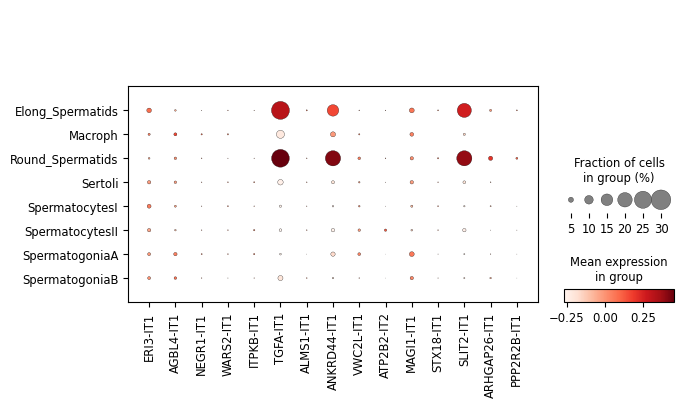

In [10]:
sc.pl.dotplot(adata, intr_genes[:15], groupby='spermatogenesis_types')

In [11]:
# LINC genes, True/False vector
LINC = ['LINC' in i for i in adata.var_names] 

In [12]:
LINC_genes = adata[:,LINC].var_names

In [14]:
LINC_genes

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01770',
       'LINC01134', 'LINC01346', 'LINC01345', 'LINC02780', 'LINC01777',
       ...
       'LINC01278', 'LINC00630', 'LINC02589', 'LINC01285', 'LINC00629',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1686)

In [32]:
type(LINC_genes)

pandas.core.indexes.base.Index

In [36]:
LINC_list = list(LINC_genes.values)

In [37]:
LINC_list

['LINC01409',
 'LINC00115',
 'LINC01128',
 'LINC01786',
 'LINC01770',
 'LINC01134',
 'LINC01346',
 'LINC01345',
 'LINC02780',
 'LINC01777',
 'LINC01646',
 'LINC02781',
 'LINC02782',
 'LINC00337',
 'LINC01672',
 'LINC01714',
 'LINC02606',
 'LINC01647',
 'LINC02766',
 'LINC01784',
 'LINC01772',
 'LINC01783',
 'LINC02810',
 'LINC01654',
 'LINC01757',
 'LINC01141',
 'LINC02596',
 'LINC01635',
 'LINC00339',
 'LINC01355',
 'LINC02800',
 'LINC02793',
 'LINC01715',
 'LINC01756',
 'LINC01648',
 'LINC01778',
 'LINC01137',
 'LINC02786',
 'LINC01343',
 'LINC01685',
 'LINC02811',
 'LINC01389',
 'LINC02794',
 'LINC02808',
 'LINC01562',
 'LINC01771',
 'LINC02784',
 'LINC01753',
 'LINC01755',
 'LINC01135',
 'LINC02777',
 'LINC01358',
 'LINC02778',
 'LINC01748',
 'LINC01739',
 'LINC00466',
 'LINC01359',
 'LINC01702',
 'LINC01707',
 'LINC02791',
 'LINC01788',
 'LINC02796',
 'LINC02797',
 'LINC01360',
 'LINC02238',
 'LINC02792',
 'LINC01781',
 'LINC01362',
 'LINC01361',
 'LINC01712',
 'LINC01725',
 'LINC

In [39]:
genes_to_plot = LINC_genes[:5]

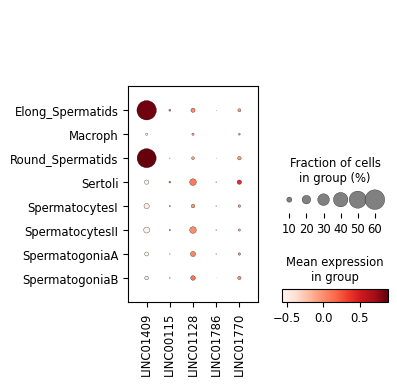

In [40]:
sc.pl.dotplot(adata, genes_to_plot, groupby='spermatogenesis_types')

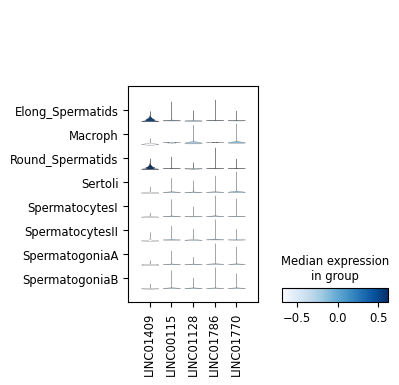

In [41]:
sc.pl.stacked_violin(adata, genes_to_plot, groupby='spermatogenesis_types', rotation=10);

In [42]:
#ax = sc.pl.stacked_violin(adata, groupby='spermatogenesis_types', swap_axes=False, dendrogram=True)


In [43]:
#sc.pl.violin(adata, [], groupby='spermatogenesis_types');

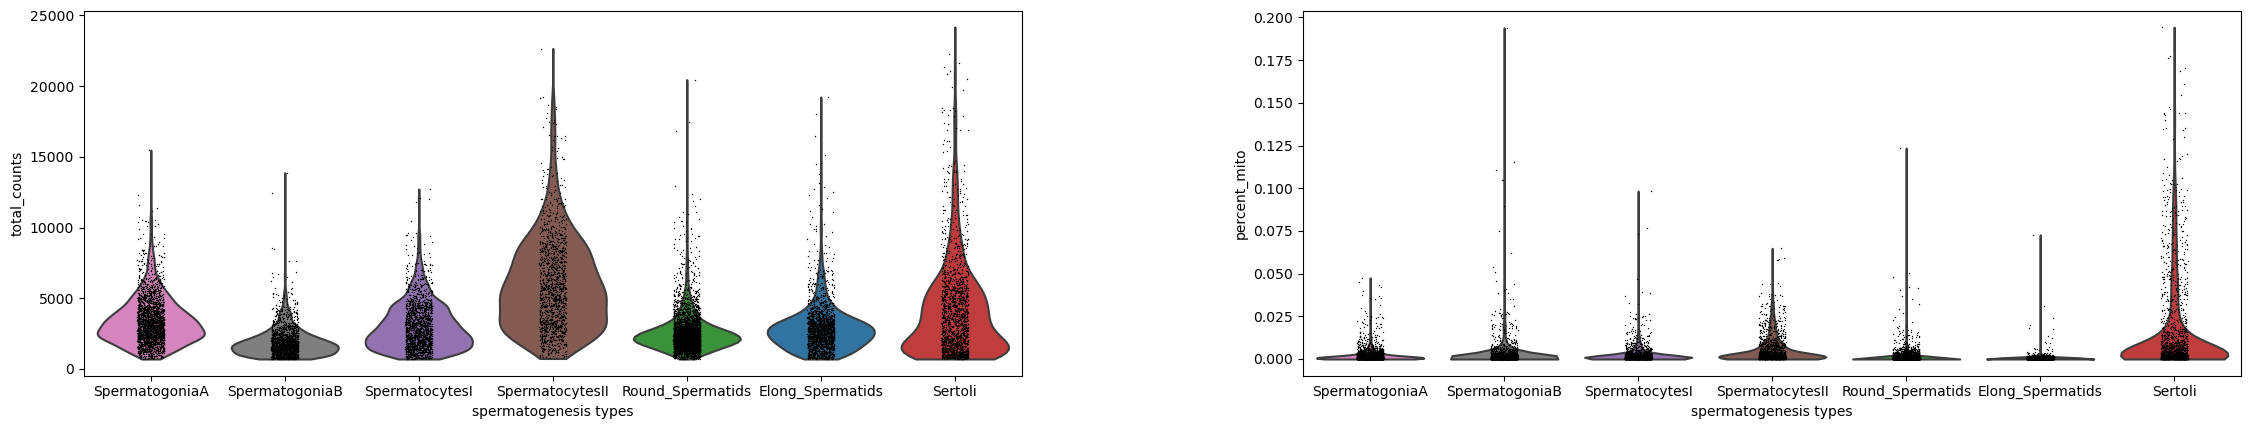

In [44]:
with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata, ['total_counts', 'percent_mito'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocytesI','SpermatocytesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

In [45]:
pd.DataFrame(adata.uns['DE_leiden']['names']).head() # top 5 ranked genes for each cluster

,0,1,2,3,4,5,6,7,8,9
0,MTUS2,PRM1,CCDC91,AUTS2,CCDC144A,CNBD1,ANKRD20A4-ANKRD20A20P,GPC5,MALAT1,MALAT1
1,CALN1,PRM2,LINC00917,amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...,LOC100506207,NLRP1,DPY19L2,SYNE2,IGFBP7,NEAT1
2,LTBP1,HMGB4,FAM186A,PTMA,SETX,LRBA,STRBP,ERBB4,NEAT1,SRGN
3,PARD3,SCP2D1,LINC01492,amplicon-chrX-VCX/2/3A/3B,DPY19L2,TSBP1,SPINK2,ZBTB20,RBMS3,TMSB4X
4,NLGN1,DNAJB7,MGAT4C,STAG1,TEX41,PSD3,COX7A2,CADM1,PTGDS,NAMPT


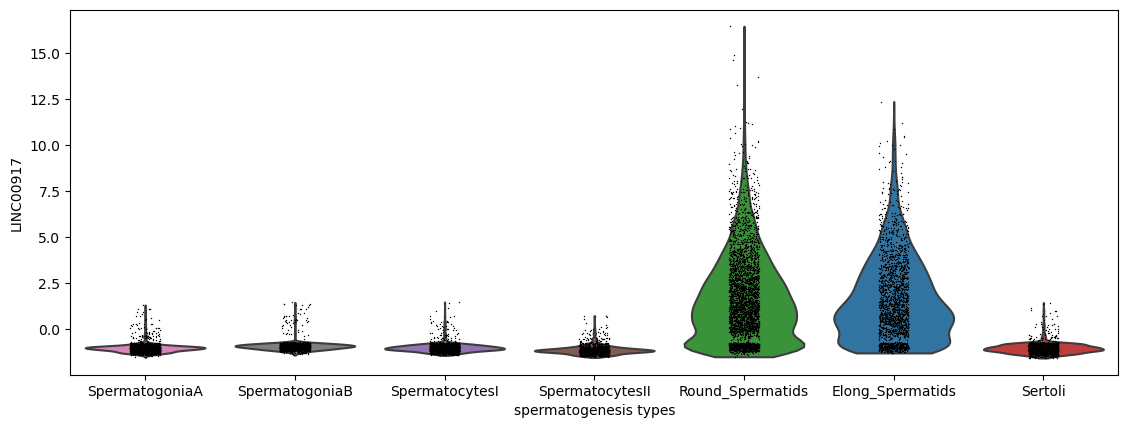

In [46]:
# If you want to compare a certain gene across groups
# no. 1 in  round spermatids
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LINC00917'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocytesI','SpermatocytesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

In [47]:
adata.uns['DE_leiden'] # from highest to lowest score

{'logfoldchanges': array([(nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan), ...,
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)],
       dtype=[('0', '<f4'), ('1', '<f4'), ('2', '<f4'), ('3', '<f4'), ('4', '<f4'), ('5', '<f4'), ('6', '<f4'), ('7', '<f4'), ('8', '<f4'), ('9', '<f4')]),
 'names': array([('MTUS2', 'PRM1', 'CCDC91', 'AUTS2', 'CCDC144A', 'CNBD1', 'ANKRD20A4-ANKRD20A20P', 'GPC5', 'MALAT1', 'MALAT1'),
        ('CALN1', 'PRM2', 'LINC00917', 'amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'LOC100506207', 'NLRP1', 'DPY19L2', 'SYNE2', 'IGFBP7', 'NEAT1'),
        ('LTBP1', 'HMGB4', 'FAM186A', 'PTMA', 'SETX', 'LRBA', 'STRBP', 'ERBB4', 'NEAT1', 'SRGN'),
        ...,
        ('SHCBP1L', 'ZNF638', 'ZNF638', 'HMGB4', 'LI

In [48]:
adata.uns['DE_leiden']['names'][0] # no. 1 for all 7 clusters 

('MTUS2', 'PRM1', 'CCDC91', 'AUTS2', 'CCDC144A', 'CNBD1', 'ANKRD20A4-ANKRD20A20P', 'GPC5', 'MALAT1', 'MALAT1')

In [49]:
top15_LINC = []
for i in range(15):
    for gene in adata.uns['DE_leiden']['names'][i]:
        if 'LINC' in gene:
            top15_LINC.append(gene)

top15_LINC

['LINC00917',
 'LINC01492',
 'LINC01500',
 'LINC02842',
 'LINC00265',
 'LINC01206',
 'LINC02388']

In [50]:
adata

AnnData object with n_obs × n_vars = 15202 × 28437
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'distances'

In [52]:
sc.pl.dotplot(adata, top15_LINC, groupby='spermatogenesis_types', categories_order=['SpermatogoniaA','SpermatogoniaB','SpermatocytesI','SpermatocytesII','Round_Spermatids','Elong_Spermatids','Sertoli','Macroph'])

ERROR: Please check that the categories given by the `order` parameter match the categories that want to be reordered.

Mismatch: {'Macroph'}

Given order categories: ['SpermatogoniaA', 'SpermatogoniaB', 'SpermatocytesI', 'SpermatocytesII', '-', 'Round_Spermatids', 'Elong_Spermatids', 'Sertoli']

spermatogenesis_types categories: ['Elong_Spermatids', 'Macroph', 'Round_Spermatids', 'Sertoli', 'SpermatocytesI', 'SpermatocytesII', 'SpermatogoniaA', 'SpermatogoniaB']



AttributeError: 'DotPlot' object has no attribute 'group_extra_size'

In [38]:

new_names = {
    '0':'Round_Spermatids',
    '1':'-',
    '2':'Round_Spermatids',
    '3':'Elong_Spermatids',
    '4':'SpermatogoniaB',
    '5':'SpermatocytesI',
    '6':'SpermatocytesII',
    '7':'SpermatogoniaA',
    '8':'SpermatocytesI',
    '9':'Sertoli'
}


In [20]:
adata

AnnData object with n_obs × n_vars = 7407 × 25509
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'spermatogenesis_types2'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'log1p', 'neighbors', 'pca', 'scaled_DE_leiden', 'spermatogenesis_types2_colors', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspli

In [21]:
adata.varm['PCs']

array([[-0.00788773,  0.00585284,  0.00700681, ...,  0.00307294,
         0.00952822,  0.00118785],
       [ 0.00657631,  0.00271585,  0.01294122, ...,  0.00160555,
         0.0030654 ,  0.0022331 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00490915,  0.0127488 , -0.00271461, ..., -0.00530995,
         0.00780153, -0.00504433],
       [-0.02171968,  0.06190937, -0.01079962, ..., -0.02153959,
         0.00218953,  0.0089512 ]])

In [22]:
adata.uns['pca']

{'params': {'use_highly_variable': True, 'zero_center': True},
 'variance': array([257.3791471 , 139.7424514 ,  96.57718822,  75.97439434,
         50.4448972 ,  45.21416121,  35.82794981,  32.23291902,
         29.47625021,  23.18407148,  19.40101489,  18.69477703,
         15.65486393,  14.36910773,  12.75617574,  11.70465629,
         11.53201198,  10.62706719,   9.86689815,   9.47494573,
          9.23170763,   9.0395166 ,   8.37854787,   8.11138072,
          7.80767027,   7.62579443,   7.44207136,   7.15213158,
          7.10453302,   6.99317371,   6.74289794,   6.6540222 ,
          6.54668644,   6.35180742,   6.25545894,   6.19835047,
          6.10145341,   6.0673934 ,   6.04008768,   5.98456541,
          5.93940637,   5.92631675,   5.84681988,   5.82716875,
          5.81637105,   5.8012908 ,   5.78144627,   5.76226409,
          5.75110087,   5.74944765]),
 'variance_ratio': array([0.0172175 , 0.00934814, 0.00646058, 0.00508234, 0.00337454,
        0.00302462, 0.00239673, 0

PC1(1,72 % variance explained), PC2(0,93 % variance explained)

In [ ]:
sc.tl.dendrogram

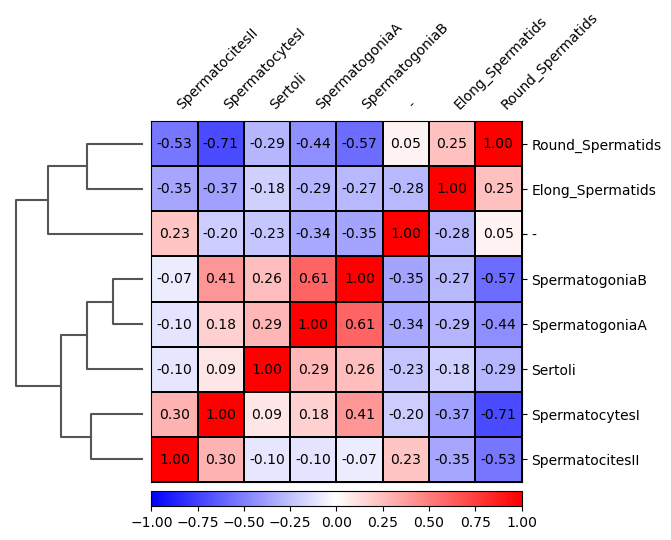

In [62]:
sc.pl.correlation_matrix(adata,'spermatogenesis_types', show_correlation_numbers=True)